# MinMaxScaler

In [555]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

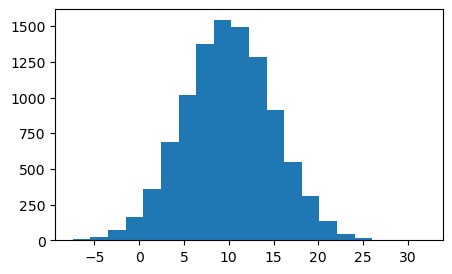

In [556]:
data = np.random.normal(10,5,10000)
plt.figure(figsize=(5,3))
plt.hist(data,20)
plt.show()

## 轉換

In [557]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
minMaxScalerObj = scaler.fit(data.reshape(-1,1))
data_new = minMaxScalerObj.transform(data.reshape(-1,1))
data_new

array([[0.49834093],
       [0.2886464 ],
       [0.26639242],
       ...,
       [0.28857239],
       [0.35726001],
       [0.61719096]])

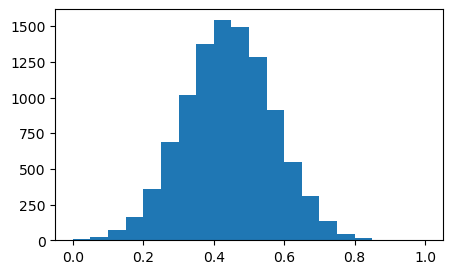

In [558]:
plt.figure(figsize=(5,3))
plt.hist(data_new,20)
plt.show()

## 均勻分配轉換

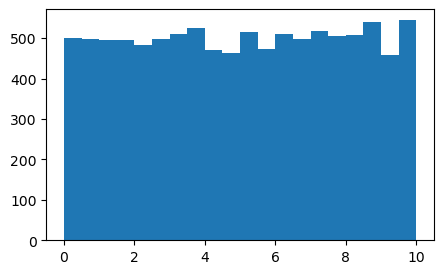

In [559]:
data = np.random.uniform(0,10,10000)
plt.figure(figsize=(5,3))
plt.hist(data,20)
plt.show()


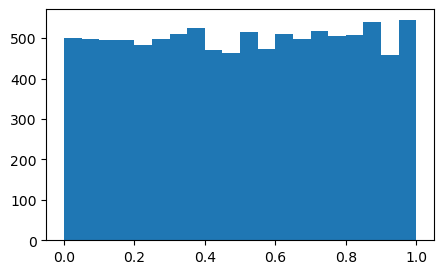

In [560]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_new = scaler.fit_transform(data.reshape(-1,1))
plt.figure(figsize=(5,3))
plt.hist(data_new,20)
plt.show()

## Gamma分配轉換

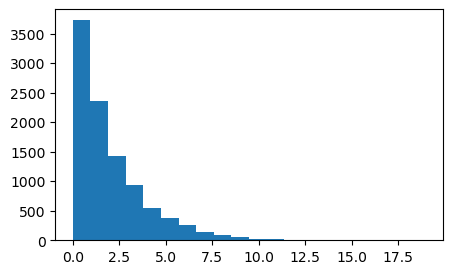

In [561]:
data = np.random.gamma(1,2,10000)
plt.figure(figsize=(5,3))
plt.hist(data,20)
plt.show()

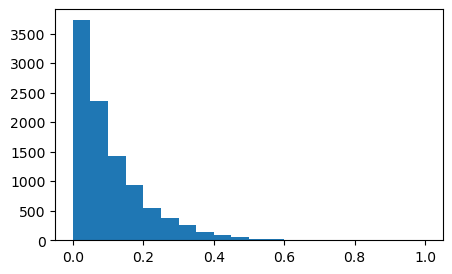

In [562]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_new = scaler.fit_transform(data.reshape(-1,1))
plt.figure(figsize=(5,3))
plt.hist(data_new,20)
plt.show()

## 簡單測試

In [563]:
data = [[-1, 2], 
        [-0.5, 6],
          [0, 10],
            [1, 18]]
scaler = MinMaxScaler()
scaler.fit(data)
print(scaler.data_min_,scaler.data_max_)

[-1.  2.] [ 1. 18.]


In [564]:
data_new = scaler.transform(data)
print(data_new)

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [565]:
data2 = [[-2,20]]
data_new2 = scaler.transform(data2)
print(data_new2)

[[-0.5    1.125]]


## 資料還原

In [566]:
scaler.inverse_transform(data_new2)

array([[-2., 20.]])

## 設定參數 feature_range，改變轉換後的範圍(-1, 1)

In [567]:
scaler = MinMaxScaler(feature_range=(-1,1))
data_new = scaler.fit_transform(data)
print(data_new)

[[-1.  -1. ]
 [-0.5 -0.5]
 [ 0.   0. ]
 [ 1.   1. ]]


## 設定參數 clip=True，強制裁剪，轉換後的資料不會超出範圍

In [568]:
scaler = MinMaxScaler(clip=True ,feature_range=(-1,1))
data_new = scaler.fit_transform(data)
print(data_new)

[[-1.  -1. ]
 [-0.5 -0.5]
 [ 0.   0. ]
 [ 1.   1. ]]


In [569]:
data2 = [[-2,20]]
data_new = scaler.transform(data2)
print(data_new)

[[-1.  1.]]


# 鳶尾花(Iris)品種的辨識

## 載入相關套件

In [570]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [571]:
X,y = datasets.load_iris(return_X_y=True)
X ,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [572]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

## 特徵縮放

In [573]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 選擇演算法

In [574]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# 模型訓練

In [575]:
clf.fit(X_train_std,y_train)

LogisticRegression()

# 模型評估

In [576]:
y_pred = clf.predict(X_test_std)
y_pred

array([1, 0, 2, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, 1, 0, 2, 2, 0, 1, 2, 0, 1,
       2, 1, 1, 2, 2, 1, 0, 0])

In [577]:
print(f"{accuracy_score(y_test,y_pred) * 100:.2f}")

86.67


In [578]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[11  0  0]
 [ 0  9  4]
 [ 0  0  6]]


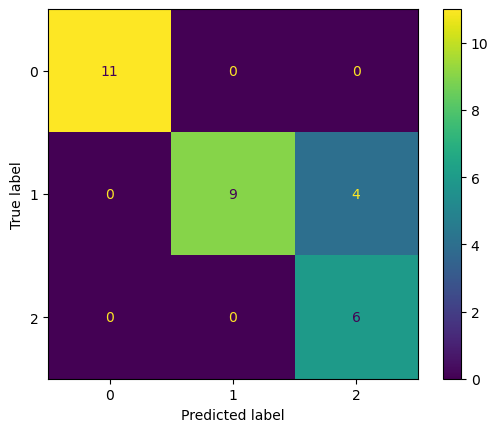

In [579]:
from sklearn.metrics import ConfusionMatrixDisplay
dips = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
dips.plot()
plt.show()

## 載入相關套件

In [580]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [581]:
X,y = datasets.load_iris(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

## StandardScaler 特徵縮放

In [582]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 選擇演算法

In [583]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_std,y_train)

LogisticRegression()

In [584]:
y_pred = clf.predict(X_test_std)
print(f"{accuracy_score(y_test,y_pred) * 100:.2f}")

100.00


In [585]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [586]:
clf = LogisticRegression()
clf.fit(X_train_std,y_train)
y_pred = clf.predict(X_test_std)

In [587]:
print(f"{accuracy_score(y_test,y_pred) * 100:.2f}")

90.00


In [588]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

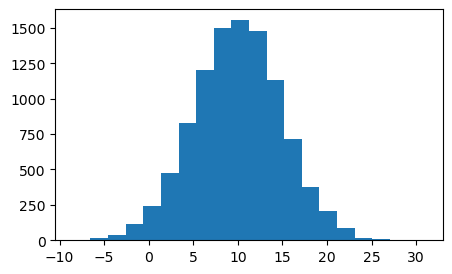

In [593]:
data = np.random.normal(10,5,10000)
plt.figure(figsize=(5,3))
plt.hist(data,20)  
plt.show()

## 轉換

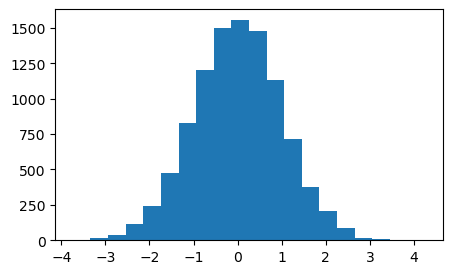

In [594]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_new = scaler.fit_transform(data.reshape(-1,1))
plt.figure(figsize=(5,3))
plt.hist(data_new,20)
plt.show()

## 均勻分配轉換

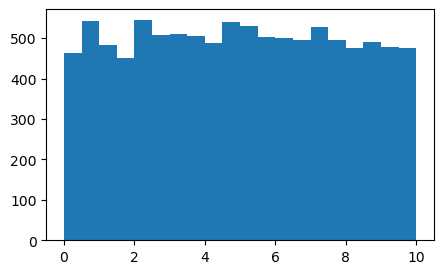

In [596]:
data = np.random.uniform(0,10,10000)
plt.figure(figsize=(5,3))
plt.hist(data,20)
plt.show()

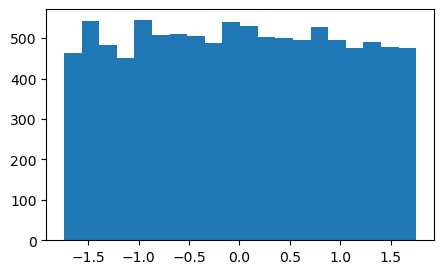

In [600]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_new = scaler.fit_transform(data.reshape(-1,1))
plt.figure(figsize=(5,3))
plt.hist(data_new,20)
plt.show()

## Gamma分配轉換

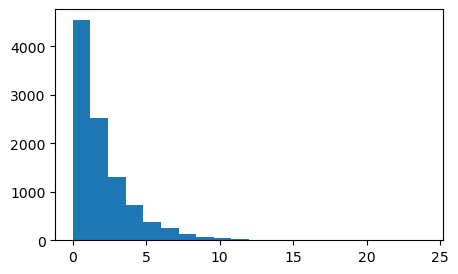

In [601]:
data = np.random.gamma(1,2,10000)
plt.figure(figsize=(5,3))
plt.hist(data,20)
plt.show()

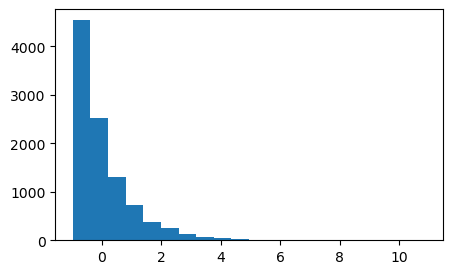

In [602]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_new = scaler.fit_transform(data.reshape(-1,1))
plt.figure(figsize=(5,3))
plt.hist(data_new,20)
plt.show()

## 簡單測試

In [ ]:
from sklearn.preprocessing import StandardScaler
data = [[-1, 2],
         [-0.5, 6], 
         [0, 10], 
         [1, 18]]
scaler = StandardScaler(with_mean=True,with_std=True)
scaler.fit(data)
print(scaler.mean_,scaler.var_)

[-0.125  9.   ] [ 0.546875 35.      ]


In [604]:
data_new = scaler.transform(data)
print(data_new)

[[-1.18321596 -1.18321596]
 [-0.50709255 -0.50709255]
 [ 0.16903085  0.16903085]
 [ 1.52127766  1.52127766]]


## 使用NumPy驗算

In [605]:
np.mean(data,axis=0)

array([-0.125,  9.   ])

In [ ]:
np.var(data,axis=0)

array([0.73950997, 5.91607978])

In [ ]:
#減 平均值 / 標準差 